In [25]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [26]:
chipotle_data.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [27]:
chipotle_data.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [28]:
# group the data by 'item_name', then sum all the columns
# sort the groups in descending order by the sum of 'quantity'
# then we select the topmost group which has the highest sum of 'quantity'
most_ordered = chipotle_data.groupby('item_name').sum().sort_values(by='quantity', ascending=False).head(1)
most_ordered[['quantity']] 

,quantity
item_name,
Chicken Bowl,761


In [30]:
# Ensure 'item_price' is in a proper numeric format
chipotle_data['item_price'] = chipotle_data['item_price'].str.replace('$', '').astype(float)

# Calculate the total revenue
chipotle_data['total_price'] = chipotle_data['quantity'] * chipotle_data['item_price']
total_revenue = chipotle_data['total_price'].sum()

# Print the total revenue
print(f"Total revenue: ${total_revenue:.2f}")

Total revenue: $39237.02


In [16]:
total_orders = chipotle_data['order_id'].nunique()

In [31]:
total_orders = chipotle_data['order_id'].nunique()
print(f"Total orders placed: {total_orders}")

Total orders placed: 1834


In [32]:
# How many items cost more than $10?
# We need to consider the unit price, hence we divide 'item_price' by 'quantity'
chipotle_data['unit_price'] = chipotle_data['item_price'] / chipotle_data['quantity']
items_over_10 = chipotle_data[chipotle_data['unit_price'] > 10].nunique()['item_name']
print(f"Number of items costing more than $10: {items_over_10}")

Number of items costing more than $10: 25


In [33]:
# List the name of all unique items in the dataset
unique_items = chipotle_data['item_name'].unique()
print(f"Unique items: {list(unique_items)}")

Unique items: ['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar', 'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl', 'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos', 'Chips and Guacamole', 'Chicken Crispy Tacos', 'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda', 'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl', 'Bottled Water', 'Chips and Tomatillo Green Chili Salsa', 'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl', 'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl', 'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa', 'Barbacoa Crispy Tacos', 'Veggie Salad Bowl', 'Chips and Roasted Chili-Corn Salsa', 'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos', 'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl', '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl', 'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos', 'Steak Salad', 'Chips and Mild Fresh Tomato Salsa', 'Veggie Soft Tacos', 'Carnitas Salad Bowl'

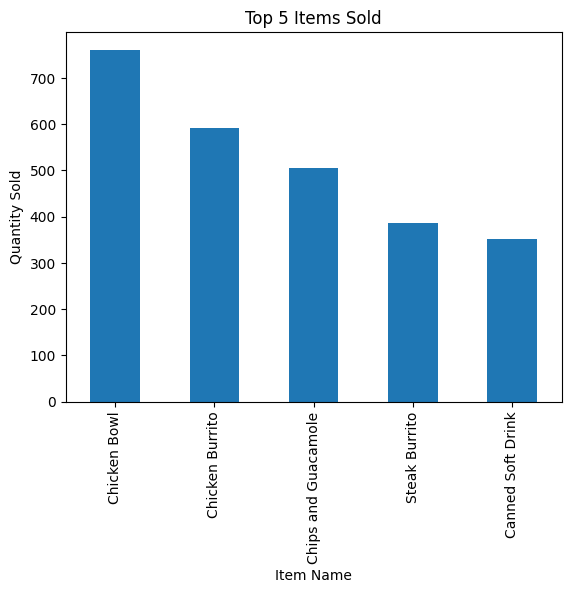

In [35]:
# Create a bar graph of the top 5 items sold

import matplotlib.pyplot as plt

top_5_items = chipotle_data.groupby('item_name').sum().sort_values('quantity', ascending=False).head(5)
top_5_items['quantity'].plot(kind='bar', title='Top 5 Items Sold')
plt.xlabel('Item Name')
plt.ylabel('Quantity Sold')
plt.show()

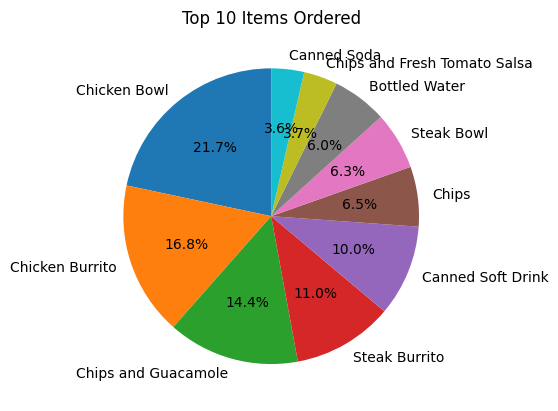

In [36]:
# Create a pie chart showing the number of times each of the top 10 items were ordered
top_10_items = chipotle_data.groupby('item_name').sum().sort_values('quantity', ascending=False).head(10)
top_10_items['quantity'].plot(kind='pie', title='Top 10 Items Ordered', autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Hide the 'quantity' label on the pie chart
plt.show()

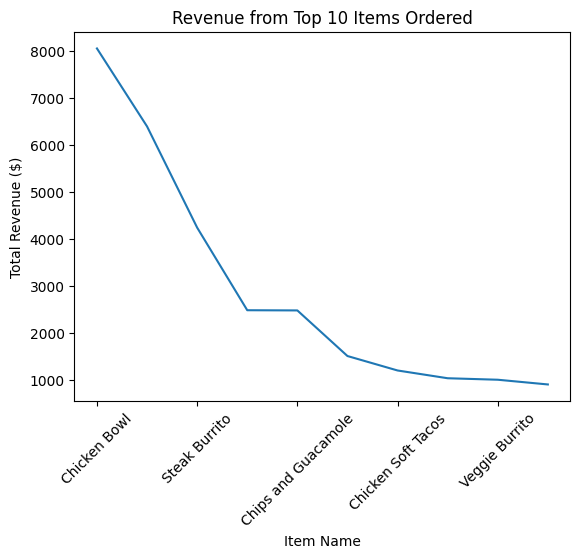

In [37]:
# Create a line graph showing how much money was spent on the top 10 items ordered
top_10_revenue = chipotle_data.groupby('item_name').sum().sort_values('total_price', ascending=False).head(10)
top_10_revenue['total_price'].plot(kind='line', title='Revenue from Top 10 Items Ordered')
plt.xlabel('Item Name')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)  # Rotate item names for better readability
plt.show()